![example](images/camera-filming-banner2.jpg)

# A Movie Production Analysis for Microsoft

**Authors:** Sameeha Ramadhan

## Overview

This analysis attempts to satisfy the informational needs of Microsoft (MSFT) by investigating the film industry to determine which types of films their new studio should produce. We will look at a number of factors to better understand what contributes to the success of a movie, and in turn offer a few recommendations on the best strategies to get started. Descriptive analysis of popular genres and ratings data show that while the preferred movie types that some people enjoy varies seasonally (think: horror films around Halloween and Christmas movies during the Christmas season), overall the three types of films that are currently doing the best are: . Microsoft can use this analysis to adjust planning, production, and marketing to hit the ground running as they enter this highly competitve space.


 # Business Problem
 ![example](images/data-film.jpg)

Microsoft may be able to enter the movie making sector and successfully stand out from fierce competition by choosing to create films that their target audiences have shown to thoroughly enjoy. Doing so will allow them to produce movies that will instantly become hits, which will in turn allow them to improve on and produce even more content, setting them up to be a studio force to be reckoned with. Using data from well-known industry sources such as Imdb, I analyze and explain patterns in popular movie types based on ratings and reviews, as well as budgeting decisions to help predict what audiences want from a film and thus, guaranteeing its success.

## Data Understanding

Rotten Tomatoes is a well-known review-aggregation website for television and film. Due to its frequent use by the American public, it is widely viewed as the 'go-to' in deciding whether or not a movie or show is worth watching. IMDB.com is a database that is considered the most authoritative source for all film and television related material. The data from both websites provides information such as, but not limited to, budgets, reviews and ratings.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

%matplotlib inline

In [2]:
#Provided datasets:
title_ratings = pd.read_csv('./data/imdb.title.ratings.csv.gz')
title_akas = pd.read_csv('./data/imdb.title.akas.csv.gz')
imdb_basics = pd.read_csv('./data/imdb.title.basics.csv.gz')
name_basics = pd.read_csv('./data/imdb.name.basics.csv.gz')
title_principals = pd.read_csv('./data/imdb.title.principals.csv.gz')
movies = pd.read_csv('./data/tmdb.movies.csv.gz')
movies_gross = pd.read_csv('./data/bom.movie_gross.csv.gz')
movies_budget = pd.read_csv('./data/tn.movie_budgets.csv.gz')
rt_critic_reviews = pd.read_csv('./data/rotten_tomatoes_critic_reviews.csv.gz')
rt_movies = pd.read_csv('./data/rotten_tomatoes_movies.csv.gz')

When starting this analysis, the first thought that comes to mind is what are the most popular types of movies and what are the average profits for the top 3 genres. To start exploring these facts, I will begin by examining and sorting the top 20 movie genres and then plotting the results for easy viewing.

In [3]:
#Preview the imdb_basics table.
imdb_basics.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
#I make a new dataframe from the 'genres' column by first splitting the column where each comma is found. I then pivot
#the table using the explode method while counting the number of times each genre appears by using the value_counts method.
#Then, preview.
genre_count = imdb_basics['genres'].str.split(',').explode().value_counts()
movie_genres = pd.DataFrame(genre_count)
#Rename the columns
movie_genres.reset_index(inplace=True)
movie_genres = movie_genres.rename(columns = {'index':'Genre', 'genres':'Movie Count'})
movie_genres.head(20)

,Genre,Movie Count
0,Documentary,51640
1,Drama,49883
2,Comedy,25312
3,Thriller,11883
4,Horror,10805
5,Action,10335
6,Romance,9372
7,Biography,8722
8,Crime,6753
9,Adventure,6465


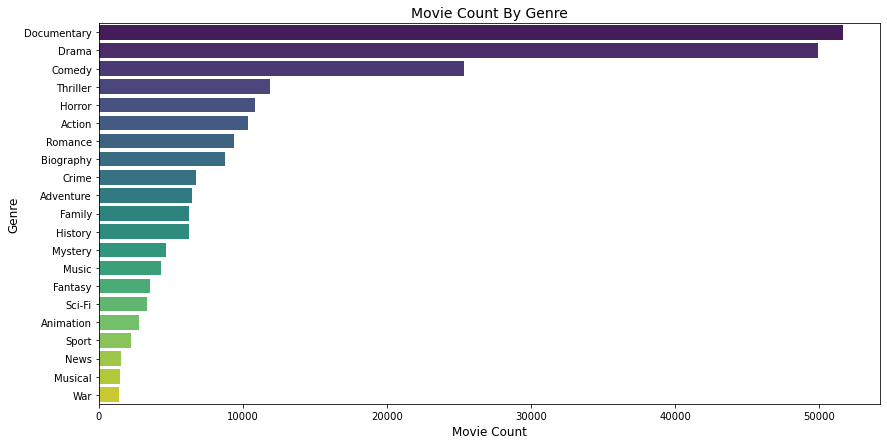

In [5]:
plt.figure(figsize=(14,7))
ax1 = sns.barplot(x=movie_genres.loc[0:20,'Movie Count'], y=movie_genres.loc[0:20,'Genre'], palette='viridis')
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Movie Count By Genre', fontsize=14);

We can see from this chart that Documentaries top the number of films produced, followed by Dramas and Comedies. However, for a studio producing movies, the important question is which films are most profitable.

I will first determine how much profit each movie has made. To do so, we start by looking at the movies_budget data frame.


In [6]:
#Preview the movies_budget data frame.
movies_budget.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [7]:
#I make a new data frame so I can return to the original one should need be:
movie_profits = movies_budget
#Then I will need to convert the production_budget, domestic_gross, and worldwide_gross columns to integers in order to 
#make calculations. First, I remove the '$':
movie_profits.domestic_gross = [x.strip('$') for x in movie_profits.domestic_gross]
movie_profits.production_budget = [x.strip('$') for x in movie_profits.production_budget]
movie_profits.worldwide_gross = [x.strip('$') for x in movie_profits.worldwide_gross]

In [8]:
#Then, I remove the commas,
movie_profits.domestic_gross = movie_profits['domestic_gross'].astype(str).str.replace(',', '').astype(int) 
movie_profits.production_budget = movie_profits['production_budget'].astype(str).str.replace(',', '').astype(int) 
movie_profits.worldwide_gross = movie_profits['worldwide_gross'].astype(str).str.replace(',', '').astype(np.int64) 
#Because the numbers in this column are large, I used the .astype(np.int64) method.

Now let's remove all non profitable movies and have a look at our new data frame.

In [9]:
movie_profits = movies_budget[movies_budget['domestic_gross'] !=0]
movie_profits

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


Next, I'll create and add a new column by calculating the profit of each film and defining it as profits.

In [10]:
movie_profits['profit'] = movie_profits['worldwide_gross'] - movie_profits['production_budget']
movie_profits

<ipython-input-10-ccd9e5e6756d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_profits['profit'] = movie_profits['worldwide_gross'] - movie_profits['production_budget']


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747
...,...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644,64644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,-6100
5778,79,"Apr 2, 1999",Following,6000,48482,240495,234495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,-3662


And I'll add a profit margin column so we can really evaluate how much a movie has made:

In [11]:
movie_profits['profit_margin'] = (movie_profits['worldwide_gross'] - 
                                    movie_profits['production_budget'])/movie_profits['worldwide_gross']
movie_profits.head(10)

<ipython-input-11-96a7563ad708>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_profits['profit_margin'] = (movie_profits['worldwide_gross'] -


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.846921
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.607331
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.759251
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,0.850972
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,0.853525
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,663420425,0.688609
8,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,0.542645
9,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,0.658944


In [12]:
movie_profits.query('movie=="Dark Phoenix"')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036


Immediately the movie Dark Phoenix stands out as having a negative profit and profit margin which means that the movie did not make money. Since we are trying to determine which movies did the best, I will remove all films with a negative margin and arrange them by profit, from most profitable to least.

In [13]:
films_with_profit = movie_profits.loc[movie_profits['profit'] > 0]
movies_ranked = films_with_profit.sort_values(by=['profit'], ascending=False)
movies_ranked.reset_index(inplace=True)
movies_ranked.drop(columns=['index'], inplace=True)
movies_ranked.head(20)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.846921
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,0.909429
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,0.853525
3,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,0.850972
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,0.869606
5,67,"Apr 3, 2015",Furious 7,190000000,353007020,1518722794,1328722794,0.874895
6,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897,1292935897,0.851772
7,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,0.906834
8,42,"Feb 16, 2018",Black Panther,200000000,700059566,1348258224,1148258224,0.851660
9,13,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760,1305772799,1135772799,0.869809


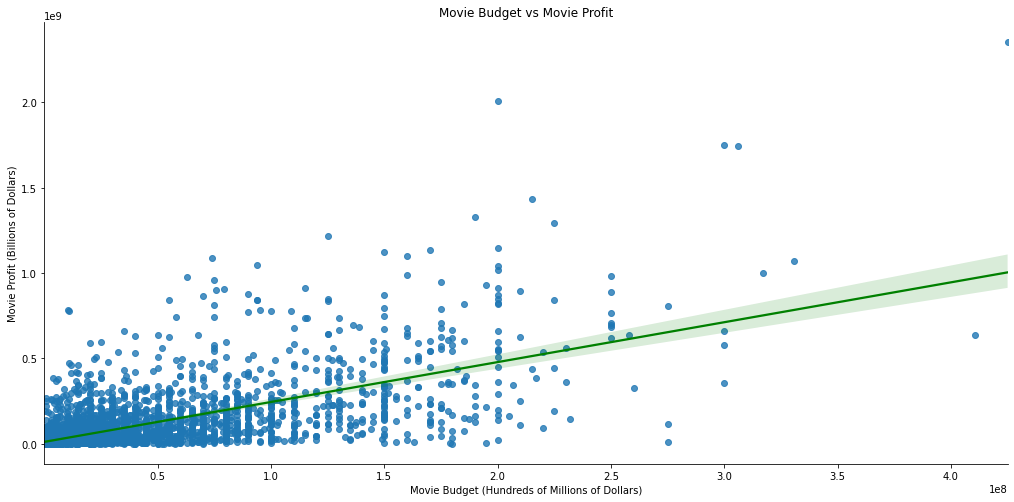

In [14]:
ax2 = sns.lmplot(x='production_budget', y='profit', data=movies_ranked, line_kws={'color': 'green'}, height=7, aspect=2)
plt.xlabel('Movie Budget (Hundreds of Millions of Dollars)', fontsize=10)
plt.ticklabel_format(axis='x')
plt.ylabel('Movie Profit (Billions of Dollars)', fontsize=10)
plt.title('Movie Budget vs Movie Profit', fontsize=12);

The upward trend (as indicated by the green line) shows that in general as a movie's budget increases, so does its profit. Based on this plot, we can begin to get a sense of what a budget should be per movie. To get a better look I will plot the top 20 movies and their budgets.

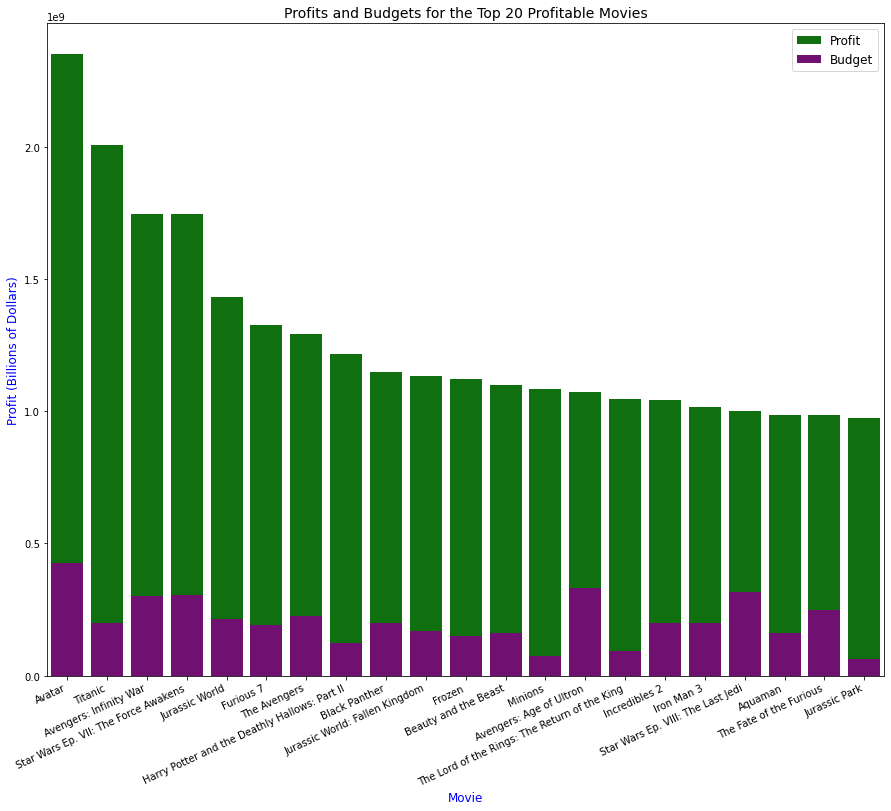

In [15]:
plt.figure(figsize=(15,12))
sns.barplot(x=movies_ranked.loc[0:20, 'movie'],y=movies_ranked.loc[0:20, 'profit'], 
            color='green', label='Profit')
sns.barplot(x=movies_ranked.loc[0:20, 'movie'],y=movies_ranked.loc[0:20, 'production_budget'], 
            color='purple', label='Budget')
plt.xlabel('Movie', fontsize=12, color='blue')
plt.title("Profits and Budgets for the Top 20 Profitable Movies", fontsize=14)
plt.ylabel('Profit (Billions of Dollars)', fontsize=12, color='blue')
plt.xticks(rotation=25, horizontalalignment='right', fontsize=10)
plt.legend(fontsize=12);

We can see clearly that the top 20 movies have incredible profits, with a mean margin of a whopping 86%! This is valuable information, especially considering that an average amount of $207,360,000 was spent per production.

In [16]:
movies_ranked.loc[0:20, 'production_budget'].mean()

207361904.76190478

In [17]:
print(movies_ranked.loc[0:20, 'profit_margin'].mean())
print(movies_ranked.loc[0:20, 'production_budget'].mean())

0.8614208520846783
207361904.76190478


Using the facts we've extracted above, we can see that the majority of the top 20 movies have a margin above 80% and now can decide on a set profit margin that we'd like to see.
Based on this, we could suggest that Microsoft aim to spend about $200,000,00 per movie with an expectation of at lease 80% in profits, however this conclusion could be flawed since many high budget movies have not had high profit margins. See the previous observation we've made that the movie Dark Phoenix not only did not earn any profit, but it also lost a large amount despite it's high budget:

In [18]:
movie_profits.query('movie=="Dark Phoenix"')

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036


So to get a more accurate figure, I will examine all of the profitable movies, not simply the top 20. In doing so, I immediately notice that the production budget increased while the profits and profit margins decreased (by almost 20%!).

In [19]:
movies_ranked.describe()

,id,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
count,3611.000000,3.611000e+03,3.611000e+03,3.611000e+03,3.611000e+03,3611.000000
mean,51.264747,3.880039e+07,6.338459e+07,1.403879e+08,1.015875e+08,0.623736
std,28.895508,4.763967e+07,7.844615e+07,2.056717e+08,1.715316e+08,0.244866
min,1.000000,1.100000e+03,4.055000e+03,7.164400e+04,3.490000e+02,0.000265
25%,26.000000,7.200000e+06,1.512481e+07,2.592765e+07,1.155564e+07,0.461530
50%,52.000000,2.100000e+07,3.901224e+07,6.883874e+07,3.930062e+07,0.675288
75%,76.000000,5.000000e+07,8.013663e+07,1.658953e+08,1.138819e+08,0.817422
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,0.999444


In [20]:
movies_ranked['production_budget'].mean()

38800385.92605926

I've decided based on this information that to filter the data with a profit margin of at least 70% and a budget greater than $38,800,385 makes the most sense, I believe a margin any lower than 70% would not be the preferred aim of a new movie studio.

In [21]:
profit_over_70 = movie_profits.loc[(movie_profits['profit_margin'] >= 0.70) & 
                         (movie_profits['production_budget'] > 38800385)]
profit_over_70

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.846921
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.759251
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,0.850972
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,0.853525
...,...,...,...,...,...,...,...,...
1436,37,"Jul 31, 1987",The Living Daylights,40000000,51185000,191200000,151200000,0.790795
1438,39,"Feb 14, 2007",Music and Lyrics,40000000,50572589,146196885,106196885,0.726396
1448,49,"Aug 12, 2011",Final Destination 5,40000000,42587643,155011165,115011165,0.741954
1483,84,"Jan 27, 2017",Resident Evil: The Final Chapter,40000000,26844692,314101190,274101190,0.872653


And finally, I will plot this new data frame to examine if our theory that the larger the budget, the higher the profit, holds true:

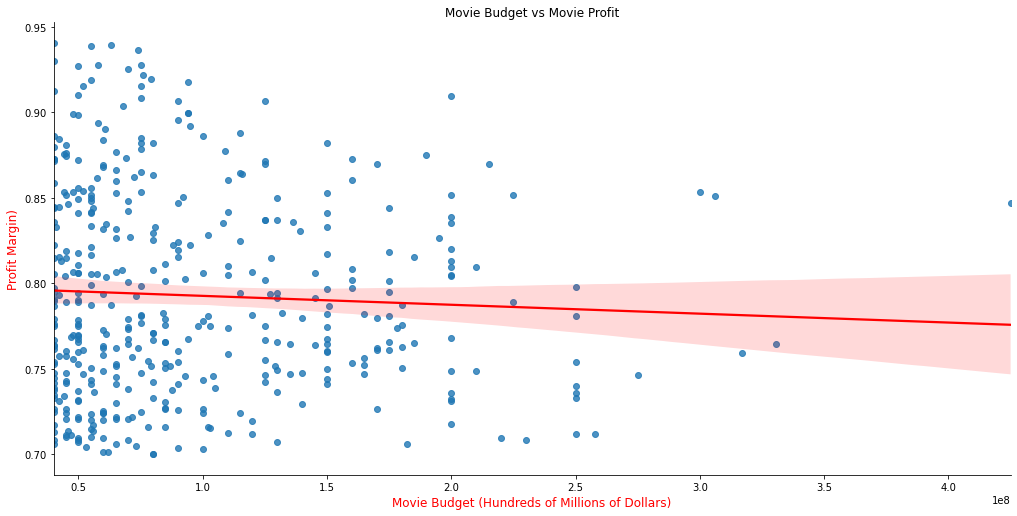

In [22]:
ax3 = sns.lmplot(x='production_budget', y='profit_margin', data=profit_over_70, 
                 line_kws={'color': 'red'}, height=7, aspect=2)
plt.xlabel('Movie Budget (Hundreds of Millions of Dollars)', fontsize=12, color='red')
plt.ticklabel_format(axis='x')
plt.ylabel('Profit Margin)', fontsize=12, color='red')
plt.title('Movie Budget vs Movie Profit', fontsize=12);

And with this visualization we can clearly see that our theory in fact did not hold true, since the trend line (indicated in red) is negative, and thus I'd recommend that Microsoft use careful restraint in budgeting. Larger budgets do not necessarily translate to larger profits, infact, it may lead to very low profit margins. In my final examination, I notice an average profit margin of and a budget of. **So to conclude: I recommend that Microsoft budget around $96,194,000 for production, which should produce a profit margin of at least 79%.**

In [23]:
print(profit_over_70['production_budget'].mean())
print(profit_over_70['profit_margin'].mean())

96194011.03286386
0.7928404497327346


Lastly, I'd like to examine when is the best time of year to release movies, and how profitable each month can be. This is important to note because many films are shown during school breaks (i.e. Christmas movies during Christmas time, etc.) and it would be useful to determine when a studio could gain the most profit.
I begin by examining the movie_profits data frame, since we are focusing on which films have a high profit margin.

In [24]:
movie_profits.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.846921
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.607331
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.337036
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.759251


In [25]:
#In order to work with the dates, I change the column type to datetime
movie_profits.loc[:, ('release_date')] = pd.to_datetime(movie_profits['release_date'])

#I make a new month column to display only the month of the release date. The %B directive means the full month name.
releasemonth =  [x.strftime('%B') for x in movie_profits['release_date']]
movie_profits.loc[:, ('month')] = releasemonth

#Count the total number of movies and group by month.
moviesper_mo = movie_profits.groupby(['month'], as_index=False)['movie'].count().sort_values(by='movie', ascending=False)
moviesper_mo

C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\15164\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,month,movie
2,December,550
10,October,530
1,August,467
9,November,456
11,September,455
6,June,450
7,March,427
0,April,423
5,July,416
8,May,382


At a first glance, we can see that the top 2 months for movie releases are December and October, followed by August. To get a better look:

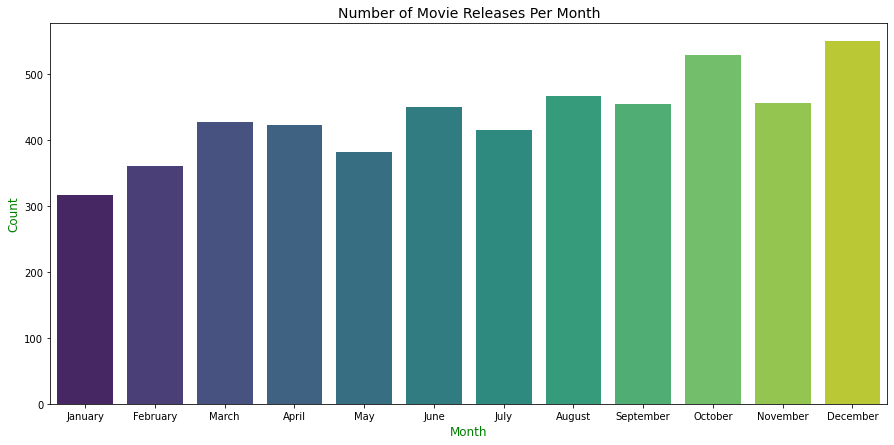

In [26]:
plt.figure(figsize=(15,7))
ax4 = sns.countplot(x=movie_profits['month'], palette='viridis',
                   order=['January', 'February', 'March', 'April', 'May', 'June', 
                          'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12, color='green')
plt.ylabel('Count', fontsize=12, color='green')
plt.title('Number of Movie Releases Per Month', fontsize=14);

Valuable information but it's important to know if this translates over to high profitability as well. To understand this, I will calculate and examine the average profit of movies, per month.

In [27]:
#I group the movies by month, and show the average profit for each.
profitpermo = movie_profits.groupby('month', as_index=False)[['profit', 'profit_margin']].median().sort_values(by='profit', ascending=False)

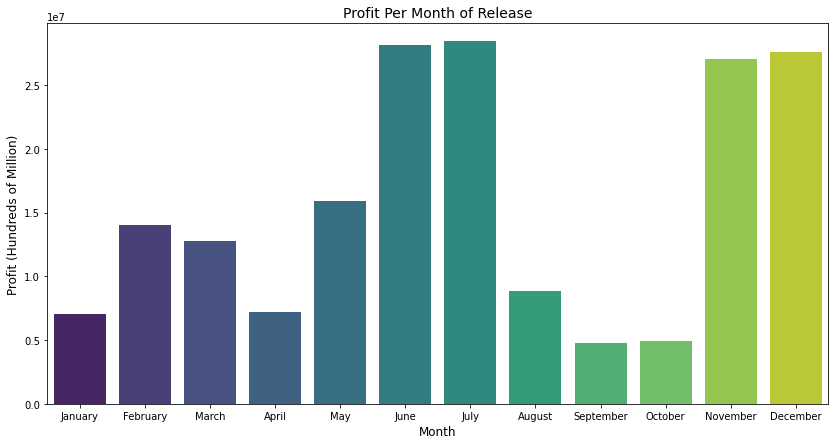

In [28]:
#Now I plot the profit first:
plt.figure(figsize=(14,7))
ax5 = sns.barplot(x=profitpermo['month'], y=profitpermo['profit'], palette='viridis', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 
                         'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit (Hundreds of Million)', fontsize=12)
plt.title('Profit Per Month of Release', fontsize=14);

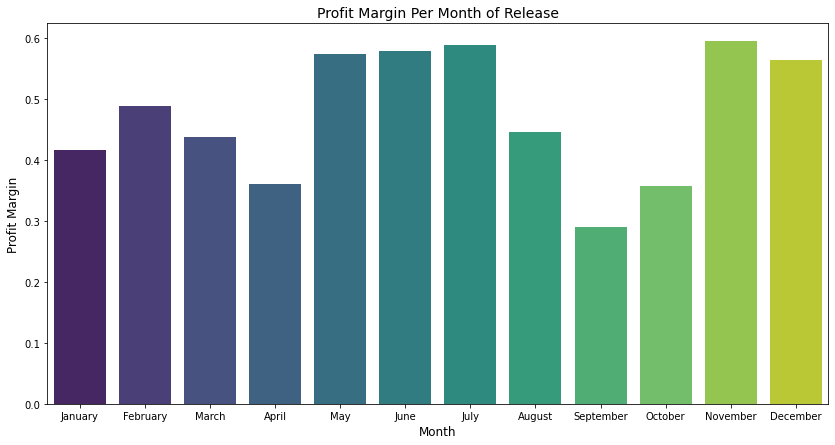

In [29]:
#And the profit margins
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=profitpermo['month'], y=profitpermo['profit_margin'], palette='viridis', 
                  order=['January', 'February', 'March', 'April', 'May', 'June', 
                         'July', 'August', 'September', 'October', 'November', 'December'])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Profit Margin', fontsize=12)
plt.title('Profit Margin Per Month of Release', fontsize=14);

Interestingly, November and July are at the top in terms of both average profit and profit margin. It appears that the summer months tend to result in greater success, while the holiday break also shows much promise. This most likely is attributed to the school and holiday breaks.

## Conclusions

After careful analysis, I have concluded that although many other factors could be considered that may alter decision making, the following conclusions will contribute to Microsoft's success as it enters the movie making industry:

I recommend that Microsoft budget approximately $96,194,000 to produce a film that should result in a profit margin around 80\%.

I recommend that the new studio should aim to release their movies between June and July, as well as over the winter holiday break.

I recommend that Microsoft should focus their efforts on the top 6 most profitable movie genres: 

